## Logistic Regression

Applied linear regression method to Classification.  
Logistic Regression does not find optimal regression linear function, but find optimal Sigmoid function and use sigmoid function return value for classification.  
Sigmoid Function: 1/(1+e^(-x)) < Return value in (0,1)  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

cancer = load_breast_cancer()

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cancer.data)

X_train , X_test, y_train , y_test = train_test_split(scaled_data, cancer.target, test_size=0.3, random_state=0)

LR = LogisticRegression()
LR.fit(X_train, y_train)
preds = LR.predict(X_test)

# accuracy와 roc_auc 측정
print('Accuracy: {:0.3f}'.format(accuracy_score(y_test, preds)))
print('ROC_AUC: {:0.3f}'.format(roc_auc_score(y_test , preds)))

Accuracy: 0.977
ROC_AUC: 0.972


Hyperparameter for Logistic Regression  
1. penalty[Default=l2]: Select Regularization(L1 or L2)  
2. C[Default=1]: inverse of alpha(regulation hyperparameter)

In [4]:
from sklearn.model_selection import GridSearchCV

params={'penalty':['l2', 'l1'],
        'C':[0.01, 0.1, 1, 5, 10]}

LR = LogisticRegression(solver='liblinear')

CV = GridSearchCV(LR, param_grid=params, scoring='accuracy', cv=3)
CV.fit(scaled_data, cancer.target)
print('Optimal Hyperparameter:{}'.format(CV.best_params_))
print('Average of Accuracy:{:.3f}'.format(CV.best_score_))

Optimal Hyperparameter:{'C': 0.1, 'penalty': 'l2'}
Average of Accuracy:0.979


### Regression Tree

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
import numpy as np

boston = load_boston()

X_features = pd.DataFrame(boston.data, columns = boston.feature_names)
y_target = pd.Series(boston.target, name='Price')

RF_Reg = RandomForestRegressor(random_state=0, n_estimators=1000)

neg_mse_scores = cross_val_score(RF_Reg, X_features, y_target, scoring="neg_mean_squared_error", cv = 5)
mse_scores = -1 * neg_mse_scores
avg_mse = np.mean(mse_scores)
rmse_scores  = np.sqrt(mse_scores)
avg_rmse = np.mean(rmse_scores)

print('MSE Scores for each 5 folds: ', np.round(mse_scores, 4))
print('Mean of MSE Scores: {0:.4f} '.format(avg_mse))

print('RMSE Scores for each 5 folds: ', np.round(rmse_scores, 4))
print('Mean of RMSE Scores: {0:.4f} '.format(avg_rmse))


c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

MSE Scores for each 5 folds:  [ 7.8829 13.1431 20.5739 46.2259 18.8781]
Mean of MSE Scores: 21.3408 
RMSE Scores for each 5 folds:  [2.8076 3.6253 4.5358 6.799  4.3449]
Mean of RMSE Scores: 4.4225 


In [6]:
def get_model_cv_prediction(model, X_features, y_target):
    neg_mse_scores = cross_val_score(model, X_features, y_target, scoring="neg_mean_squared_error", cv = 5)
    mse_scores = -1 * neg_mse_scores
    rmse_scores  = np.sqrt(mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('##### ',model.__class__.__name__ , ' #####')
    print('Mean of RMSE Scores: {0:.3f} '.format(avg_rmse))

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

DT_Reg = DecisionTreeRegressor(max_depth=4)
RF_Reg = RandomForestRegressor(n_estimators=1000)
GB_Reg = GradientBoostingRegressor(n_estimators=1000)
XGB_Reg = XGBRegressor(n_estimators=1000)
LGBM_Reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [DT_Reg, RF_Reg, GB_Reg, XGB_Reg, LGBM_Reg]
for model in models:  
    get_model_cv_prediction(model, X_features, y_target)

c:\Users\user\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


#####  DecisionTreeRegressor  #####
Mean of RMSE Scores: 5.978 
#####  RandomForestRegressor  #####
Mean of RMSE Scores: 4.423 
#####  GradientBoostingRegressor  #####
Mean of RMSE Scores: 4.269 


c:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
c:\Users\user\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future ver

#####  XGBRegressor  #####
Mean of RMSE Scores: 4.251 
#####  LGBMRegressor  #####
Mean of RMSE Scores: 4.646 


<AxesSubplot:>

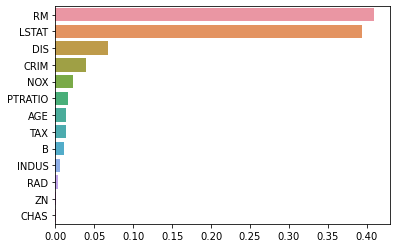

In [8]:
import seaborn as sns
%matplotlib inline

RF_Reg = RandomForestRegressor(n_estimators=1000)
  
RF_Reg.fit(X_features, y_target)

# Regression Tree does not have coef_ attribute. Use feature_importances
feature_series = pd.Series(data=RF_Reg.feature_importances_, index=X_features.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)


### Difference between Linear Regression and Regression Tree

(100,)
(100,)


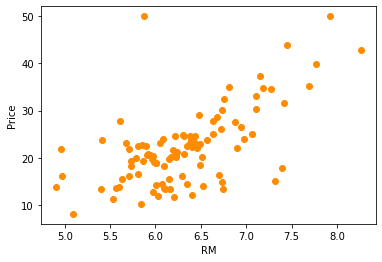

In [16]:
sampling_index = X_features.sample(n=100).index
RM_sample = X_features['RM'][sampling_index]
print(RM_sample.shape)
Price_sample = y_target[sampling_index]
print(Price_sample.shape)

plt.figure()
plt.xlabel('RM')
plt.ylabel('Price')
plt.scatter(x=RM_sample, y=Price_sample, c='darkorange')

In [19]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
RF_2 = RandomForestRegressor(max_depth=2)
RF_7 = RandomForestRegressor(max_depth=7)

X_test = np.arange(4.5, 8.5, 0.04).reshape(-1,1)

X_train = RM_sample.values.reshape(-1,1)
y_train = Price_sample.values

LR.fit(X_train, y_train)
RF_2.fit(X_train, y_train)
RF_7.fit(X_train, y_train)

pred_LR = LR.predict(X_test)
pred_RF_2 = RF_2.predict(X_test)
pred_RF_7 = RF_7.predict(X_test)

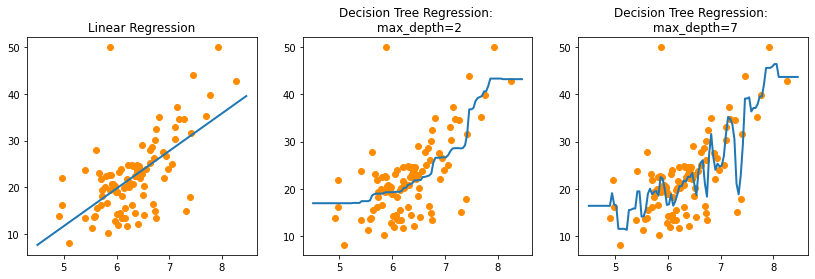

In [20]:
fig , (ax1, ax2, ax3) = plt.subplots(figsize=(14,4), ncols=3)

ax1.set_title('Linear Regression')
ax1.scatter(RM_sample, Price_sample, c="darkorange")
ax1.plot(X_test, pred_LR,label="linear", linewidth=2 )
 
ax2.set_title('Decision Tree Regression: \n max_depth=2')
ax2.scatter(RM_sample, Price_sample, c="darkorange")
ax2.plot(X_test, pred_RF_2, label="max_depth:3", linewidth=2 )

ax3.set_title('Decision Tree Regression: \n max_depth=7')
ax3.scatter(RM_sample, Price_sample, c="darkorange")
ax3.plot(X_test, pred_RF_7, label="max_depth:7", linewidth=2)